# EVALUATION SYSTEM

In order to make adjustments to the evaluation system of the school, it is important to model different scenarios to try to minimize information loss with the grading system, but keeping the foundation of the levels. The goal is to try to create a system that use the proficiency levels used in the School trying to minimize the information loss when assigninig the grades.

## Steps

1. Generate the first random grade for a specific number of students.
2. Generate 3 grades per period based on the first random grade to simulate a patter for each of the students.
3. Create the control treatment transforming the grades into a grade system from 1 to 4 with two decimal points and calculating the average for each period and for the final grade.
4. Simulate the grade in different treatments as follows:
  * Treatment 1: This is the treatment that is used nowadays, and it is the treatment that is being change, since there is a lot if information lost when grading. This treatment has four possible grades `[1, 2, 3, 4]` inside the competency it must round to the floor. The following ranges are used to calculate the grade of the period and of the grade of the subject at the end of the year: `[1 - 2) = 1, [2 - 2.50] = 2, [2.51 - 3.50] = 3, [3.51 - 4] = 4`.
  * Treatment 2: This is a treatment with seven possible grades: `[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]`, and using the control grades as the base grades to be transformed.
  * Treatment 3: This is a treatment with ten possible grades: `[1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]`, and using the control grades as the base grades to be transformed.
  * Treatment 4: This is a treatment with seven possible grades: `[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]`, and using the percentual grades as the base grades to be transformed.
  * Treatment 3: This is a treatment with ten possible grades: `[1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]`, and using the percentual grades as the base grades to be transformed.



## Libraries, variables and functions

Some of the variables that will be used during the devolpment of this project are:
* number_of_students: The number of students that will be randomly generated
* number_of_grades: The number of grades that will be assign to each students. In this case, each students will be assigned 12 grades (4 goals and 3 grades by goal)
* deviation: the size of the range that the grades of each students are expected to fluctuate
* min_score: the lowest percentual grade a student can have

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Parameters to set
number_of_students = 100
number_of_grades = 12
deviation = 0.1
min_score = 0.30

# Set the random seed
random.seed(9)

# Dictionary of the grades that belong to each goal
goals_dict = {
    'goal_1': ['grade_1', 'grade_2', 'grade_3'],
    'goal_2': ['grade_4', 'grade_5', 'grade_6'],
    'goal_3': ['grade_7', 'grade_8', 'grade_9'],
    'goal_4': ['grade_10', 'grade_11', 'grade_12'],
}

# List of column names to be shown in the summary dataframe
summary_final_grades = ['period_p1', 'period_p2', 'period_p3']

def generate_grades(base_grades, deviation):
  """
  Generates random grades based on the list with the profile of each student (base_grades) using in the range
  given by the deviation variable, where the highest possible value is 1 and the lowert possible value is 0.

  Args:
    base_grades: list of a grade per student that represents the profile of the student.
    deviation: a float number representing the range of posible values the grade can increase or decrease for each student.

  Return:
    A list of grades for each student based on the base_grades and deviation
  """

  grades = []
  for x in base_grades:
    new_grade = round(random.uniform((x - deviation), (x + deviation)), 2)
    if new_grade > 1:
      grades.append(1)
    elif new_grade < 0:
      grades.append(0)
    else:
      grades.append(new_grade)
  return grades

def create_grades_dict(number_of_grades):
  """
  Creates a dictionary with the name of each grade as the key and the grade for each student as the values.

  Args:
    number_of_grades: an integer that represents the number of grades to be generated for each student

  Return:
    a dictionary with the grades of the students.
  """
  grades_dict = {}
  for i in range(number_of_grades):
    grades_dict['grade_' + str(i + 1)] = generate_grades(base_grades, deviation)
  return grades_dict

def create_final_grades(p1, p2, p3):
  """
  Takes 3 dataframes with the grades of the 3 periods, extract the last five columns of each period(goal 1, goal 2, goal 3, goal 4),
  creates a dataframe with these columns and add a new column called 'final_grade' which contains the mean grade of the 3 periods for each student.

  Args:
    p1, p2, p3: Dataframes with the grades of the students for each period.

  Returns:
    A data fram with the grades of the 4 goals and the grade of the period for each period, and a final grade with the average of the 3 periods.
  """

  summary_p1 = p1[p1.columns[-5:]]
  summary_p2 = p2[p2.columns[-5:]]
  summary_p3 = p3[p3.columns[-5:]]

  summary_p1_p2 = summary_p1.join(summary_p2, lsuffix='_p1')
  final_grades = summary_p1_p2.join(summary_p3, lsuffix='_p2', rsuffix='_p3')
  final_grades['final_grade'] = np.mean(final_grades[['period_p1', 'period_p2', 'period_p3']], axis=1).round(2)
  return final_grades

def grade_goal_control(tc, goals):
  """
  Calculates the grade for each goal and for the period based on the dictionary with the map of the grades

  Args:
    tc: dataframe of the grades of the period
    goals: dictionary with the map of the grades that belong to each goal.

  Returns:
    returns a dataframe with the all the grades plus the grades of the goals plus the grade of the period.
  """

  for k, v in goals.items():
    tc[k] = np.mean(tc[v], axis=1).round(2)
  return tc

def grade_goal_treatments(t, goals, func):
  """
  Function to calculate the grades of the goals and the grade of the period.

  Args:
    t: dataframe with the grades of the treatment
    goals: a dictionary with the goals and the grades belonging to that goal
    func: a function for defining how the grades are going to be rounded.

  Returns:
    a dataframe with
  """
  for k, v in goals.items():
    mean_grade = np.mean(t[v], axis=1).round(2)
    t[k] = mean_grade
    t[k] = t[k].map(lambda x: func(x))
  t['period'] = np.mean(t[['goal_1', 'goal_2', 'goal_3', 'goal_4']], axis=1).round(2)
  t['period'] = t['period'].map(lambda x: func(x))
  return t

def transform_grade_4floor(x):
  """
  Function to transform the grade into 4 categories from 1 to 4 rounding to the floor

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [2.0, 3.0, 4.0]
  grades = [1.0, 2.0, 3.0]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

def transform_grade_4approx(x):
  """
  Function to transform the grade into 4 categories from 1 to 4 approximating to the floor for
  grade less than two, and for grades higher than two, using the 0.51 threshold to round.

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [2, 2.50, 3.50]
  grades = [1, 2, 3]
  for t, g in zip(threshold, grades):
    if x <= t:
      return g
  return 4

def transform_grade_7floor(x):
  """
  Function to transform the grade into 7 categories from 1 to 4 aproximating to the floor

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
  grades = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4

def transform_grade_7approx(x):
  """
  Function to transform the grade into 7 categories from 1 to 4 rounding to the closest grade
  in the following list: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]. When the decimals of the grade
  are .25 or .75, the grade rounds down to the closest grade.


  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  # threshold = [1.25, 1.75, 2.25, 2.75, 3.25, 3.75]
  threshold = [1.25, 1.99, 2.25, 2.75, 3.25, 3.75]
  grades = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
  for t, g in zip(threshold, grades):
    if x <= t:
      return g
  return 4.0

def transform_grade_10floor(x):
  """
  Function to transform the grade into 10 categories from 1 to 4 rounding to the floor
  in the following list: [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0].

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
  grades = [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

def transform_grade_10approx(x):
  """
  Function to transform the grade into 10 categories from 1 to 4 rounding to the closest grade
  in the following list: [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]. When the decimals of the grade
  are .5, the grade rounds up to the closest grade.

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [1.2, 1.5, 2.0, 2.2, 2.5, 2.9, 3.2, 3.5, 3.9]
  grades = [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7]
  for t, g, in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

def transform_grade_percent4(x):
  """
  Function to transform the grade into 4 categories from 1 to 4 based on the percentage of achievement
  of each student. The grades will be assigned based on the following intervals: Below 40% the grade is 1.0,
  between 40% and 60% it will be 2.0, between 60% and 80% it will be 3.0, 80% or above will be 4.0.

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [0.4, 0.6, 0.8]
  grades = [1.0, 2.0, 3.0]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

def transform_grade_percent7(x):
  """
  Function to transform the grade into 7 categories from 1 to 4 based on the percentage of achievement
  of each student. The grades will be 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0 based on the following
  thresholds 0.15, 0.30, 0.44, 0.58, 0.72, 0.86, 1.0

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  # threshold = [0.2, 0.35, 0.50, 0.625, 0.75, 0.875]
  threshold = [0.15, 0.30, 0.44, 0.58, 0.72, 0.86]
  grades = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

def transform_grade_percent10(x):
  """
  Function to transform the grade into 10 categories from 1 to 4 based on the percentage of achievement
  of each student. The grades will be 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0 based on the following
  thresholds 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0

  Args:
    x: int or float representing the grade

  Returns:
    a grade transformed
  """
  threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
  grades = [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7]
  for t, g in zip(threshold, grades):
    if x < t:
      return g
  return 4.0

## Percentual grades

Create a dataframe with the grade (from 0 to 1) that each students got for each learning evidence.

In [2]:
# Generate the random grades to determine the profile of each student
base_grades = []
for b in range(number_of_students):
  random_grade = round(random.uniform(min_score, 1.0), 2)
  base_grades.append(random_grade)
print(base_grades)

# Create a dataframe with the grades of the students for each period.
period_1_df = pd.DataFrame(create_grades_dict(number_of_grades))
period_2_df = pd.DataFrame(create_grades_dict(number_of_grades))
period_3_df = pd.DataFrame(create_grades_dict(number_of_grades))
period_1_df.head(3)

[0.62, 0.56, 0.4, 0.91, 0.3, 0.65, 0.93, 0.36, 0.69, 0.73, 0.33, 0.57, 0.79, 0.62, 0.81, 0.41, 0.47, 0.38, 0.65, 0.95, 0.71, 0.84, 0.57, 0.82, 0.37, 0.5, 0.77, 0.81, 0.6, 0.36, 0.49, 0.45, 0.5, 0.87, 0.44, 0.92, 0.92, 0.34, 0.57, 0.64, 0.32, 0.6, 0.93, 0.38, 0.72, 0.38, 0.71, 0.93, 0.44, 0.31, 0.36, 0.68, 0.31, 0.36, 0.65, 0.94, 0.59, 0.58, 0.75, 0.37, 0.71, 0.42, 0.73, 0.97, 0.34, 0.69, 0.72, 0.4, 0.49, 1.0, 1.0, 0.38, 0.79, 0.97, 0.47, 0.73, 0.33, 0.56, 0.77, 0.71, 0.84, 0.36, 0.54, 0.9, 0.71, 0.62, 0.58, 0.99, 0.7, 0.31, 0.86, 0.53, 0.6, 0.45, 0.61, 0.53, 0.36, 0.74, 0.37, 0.85]


,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,0.53,0.64,0.63,0.65,0.52,0.71,0.56,0.59,0.64,0.71,0.66,0.63
1,0.62,0.50,0.47,0.56,0.48,0.61,0.47,0.57,0.48,0.60,0.63,0.53
2,0.46,0.31,0.30,0.42,0.42,0.40,0.47,0.45,0.44,0.39,0.49,0.44


## Control treatment

In this dataframe each percentual grade is transform into a grade in a scale from 1 to 4, using two decimal numbers for each grade.

In [3]:
# Transform grades into a float from 1 to 4
tc_p1 = (period_1_df * 3) + 1
tc_p2 = (period_2_df * 3) + 1
tc_p3 = (period_3_df * 3) + 1

# Calculate the grades for each goal
tc_p1_df = grade_goal_control(tc_p1, goals_dict)
tc_p2_df = grade_goal_control(tc_p2, goals_dict)
tc_p3_df = grade_goal_control(tc_p3, goals_dict)

# Calculate the grade for each period
periods_df_list = [tc_p1_df, tc_p2_df, tc_p3_df]
for p in periods_df_list:
  p['period'] = np.mean(p[['goal_1', 'goal_2', 'goal_3', 'goal_4']], axis=1).round(2)

# Summarize the grades of each period and the final grade
grades_control = create_final_grades(tc_p1_df, tc_p2_df, tc_p3_df)
grades_control.rename(columns={'final_grade': 'final_grade_c'}, inplace=True)
grades_control[summary_final_grades + ['final_grade_c']].head()

,period_p1,period_p2,period_p3,final_grade_c
0,2.87,2.87,2.79,2.84
1,2.63,2.73,2.63,2.66
2,2.25,2.21,2.12,2.19
3,3.78,3.78,3.78,3.78
4,1.92,1.96,1.95,1.94


## Treatment 1

In this set of treatments, the grading system will have seven categorical grades from 1.0 to 4.0, without decimals, namely `1.0, 2.0, 3.0, 4.0`.

In [4]:
# Transform the grades into 4 categorical grades (1, 2, 3, 4)
# t1_p1 = tc_p1_df.map(lambda x: transform_grade_4approx(x))
# t1_p2 = tc_p2_df.map(lambda x: transform_grade_4approx(x))
# t1_p3 = tc_p3_df.map(lambda x: transform_grade_4approx(x))

t1_p1 = period_1_df.map(lambda x: transform_grade_percent4(x))
t1_p2 = period_2_df.map(lambda x: transform_grade_percent4(x))
t1_p3 = period_3_df.map(lambda x: transform_grade_percent4(x))

# Calculate the grades for the goals and the grade for the period
t1_p1_df = grade_goal_treatments(t1_p1, goals_dict, transform_grade_4floor)
t1_p2_df = grade_goal_treatments(t1_p2, goals_dict, transform_grade_4floor)
t1_p3_df = grade_goal_treatments(t1_p3, goals_dict, transform_grade_4floor)

# Summarize the results of the goals and the period in one dataframe
grades_t1 = create_final_grades(t1_p1_df, t1_p2_df, t1_p3_df)

# Summarize the grades of the period
grades_t1['final_grade'] = grades_t1['final_grade'].map(lambda x: transform_grade_4floor(x))
grades_t1.rename(columns={'final_grade': 'final_grade_t1'}, inplace=True)
grades_t1[summary_final_grades + ['final_grade_t1']].head()

,period_p1,period_p2,period_p3,final_grade_t1
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,1.0,1.0,1.0,1.0
3,4.0,4.0,4.0,4.0
4,1.0,1.0,1.0,1.0


## Treatment 2

In this set of treatments, the grading system will have seven categorical grades from 1.0 to 4.0, using just one decimal grade in between of the integers, namely `1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0`.

### Treatment 2a: approx - floor

This treatment has the following characteristics:
* The grades of the evidences are approximated to the closest grade (When the decimal of the grades are .25 or .75 it rounded to the grade below)
* The grades of the goals and the grades of the period are rounded to the floor

In [5]:
# Transform the grades into 7 categorical grades
t2_p1 = tc_p1_df.map(lambda x: transform_grade_7approx(x))
t2_p2 = tc_p2_df.map(lambda x: transform_grade_7approx(x))
t2_p3 = tc_p3_df.map(lambda x: transform_grade_7approx(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t2_p1, goals_dict, transform_grade_7floor)
grades_p2_df = grade_goal_treatments(t2_p2, goals_dict, transform_grade_7floor)
grades_p3_df = grade_goal_treatments(t2_p3, goals_dict, transform_grade_7floor)

# Summarize the results of the goals and the period in one dataframe
grades_t2_a = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t2_a['final_grade'] = grades_t2_a['final_grade'].map(lambda x: transform_grade_7floor(x))
grades_t2_a.rename(columns={'final_grade': 'final_grade_t2a'}, inplace=True)
grades_t2_a[summary_final_grades + ['final_grade_t2a']].head()

,period_p1,period_p2,period_p3,final_grade_t2a
0,2.5,2.5,2.5,2.5
1,2.5,2.5,2.5,2.5
2,2.0,2.0,1.5,1.5
3,3.5,3.5,3.5,3.5
4,1.5,1.5,1.5,1.5


### Treatment 2b: approx - approx

This treatment has the following characteristics:
* The grades of the evidences are approximated to the closest grade (When the decimal of the grades are .25 or .75 it rounded to the grade below)
* The grades of the goals and the grades of the period are also approximated to the closest grade



In [6]:
# Transform the grades into 7 categorical grades
t2_p1 = tc_p1_df.map(lambda x: transform_grade_7approx(x))
t2_p2 = tc_p2_df.map(lambda x: transform_grade_7approx(x))
t2_p3 = tc_p3_df.map(lambda x: transform_grade_7approx(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t2_p1, goals_dict, transform_grade_7approx)
grades_p2_df = grade_goal_treatments(t2_p2, goals_dict, transform_grade_7approx)
grades_p3_df = grade_goal_treatments(t2_p3, goals_dict, transform_grade_7approx)

# Summarize the results of the goals and the period in one dataframe
grades_t2_b = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t2_b['final_grade'] = grades_t2_b['final_grade'].map(lambda x: transform_grade_7approx(x))
grades_t2_b.rename(columns={'final_grade': 'final_grade_t2b'}, inplace=True)
grades_t2_b[summary_final_grades + ['final_grade_t2b']].head()

,period_p1,period_p2,period_p3,final_grade_t2b
0,3.0,3.0,3.0,3.0
1,2.5,2.5,2.5,2.5
2,2.0,2.0,1.5,1.5
3,3.5,4.0,3.5,3.5
4,1.5,1.5,1.5,1.5


### Treatment 2c: floor - floor

In this treatment, the grades of the evidences are transformed rounding to the floor, and the grades of the goals and the periods are calculated also rounding to the floor.

In [7]:
# Transform the grades into 7 categorical grades
t2_p1 = tc_p1_df.map(lambda x: transform_grade_7floor(x))
t2_p2 = tc_p2_df.map(lambda x: transform_grade_7floor(x))
t2_p3 = tc_p3_df.map(lambda x: transform_grade_7floor(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t2_p1, goals_dict, transform_grade_7floor)
grades_p2_df = grade_goal_treatments(t2_p2, goals_dict, transform_grade_7floor)
grades_p3_df = grade_goal_treatments(t2_p3, goals_dict, transform_grade_7floor)

# Summarize the results of the goals and the period in one dataframe
grades_t2_c = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t2_c['final_grade'] = grades_t2_c['final_grade'].map(lambda x: transform_grade_7floor(x))
grades_t2_c.rename(columns={'final_grade': 'final_grade_t2c'}, inplace=True)
grades_t2_c[summary_final_grades + ['final_grade_t2c']].head()

,period_p1,period_p2,period_p3,final_grade_t2c
0,2.5,2.5,2.5,2.5
1,2.0,2.0,2.0,2.0
2,1.5,1.5,1.5,1.5
3,3.0,3.0,3.5,3.0
4,1.5,1.5,1.5,1.5


### Treatment 2d: floor - approx

In this treatment, the grades of the evidences are transformed rounding to the floor, and the grades of the goals and the periods are calculated approximating to the closest grade.

In [8]:
# Transform the grades into 7 categorical grades
t2_p1 = tc_p1_df.map(lambda x: transform_grade_7floor(x))
t2_p2 = tc_p2_df.map(lambda x: transform_grade_7floor(x))
t2_p3 = tc_p3_df.map(lambda x: transform_grade_7floor(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t2_p1, goals_dict, transform_grade_7approx)
grades_p2_df = grade_goal_treatments(t2_p2, goals_dict, transform_grade_7approx)
grades_p3_df = grade_goal_treatments(t2_p3, goals_dict, transform_grade_7approx)

# Summarize the results of the goals and the period in one dataframe
grades_t2_d = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t2_d['final_grade'] = grades_t2_d['final_grade'].map(lambda x: transform_grade_7approx(x))
grades_t2_d.rename(columns={'final_grade': 'final_grade_t2d'}, inplace=True)
grades_t2_d[summary_final_grades + ['final_grade_t2d']].head()

,period_p1,period_p2,period_p3,final_grade_t2d
0,2.5,2.5,2.5,2.5
1,2.5,2.5,2.5,2.5
2,1.5,1.5,1.5,1.5
3,3.5,3.5,3.5,3.5
4,1.5,1.5,1.5,1.5


### Treatment 2: Statistical analysis

* H0: There is not significant difference between the control and the treatments
* H1: There is a significant difference between the control and the treatments

**If p < 0.05:** reject H0 (The difference is considered statistically significant)

In [9]:
# Data Frame with the comparison of the different subtreatments for treatment 2
t2_comparison = pd.DataFrame(
    [grades_control['final_grade_c'],
     grades_t1['final_grade_t1'],
     grades_t2_a['final_grade_t2a'],
     grades_t2_b['final_grade_t2b'],
     grades_t2_c['final_grade_t2c'],
     grades_t2_d['final_grade_t2d']
     ]).T
t2_comparison.describe()

,final_grade_c,final_grade_t1,final_grade_t2a,final_grade_t2b,final_grade_t2c,final_grade_t2d
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,2.840500,2.190000,2.480000,2.690000,2.320000,2.49000
std,0.623391,1.060732,0.710385,0.812715,0.649475,0.72815
min,1.870000,1.000000,1.500000,1.500000,1.500000,1.50000
25%,2.217500,1.000000,1.875000,2.000000,1.500000,1.50000
50%,2.830000,2.000000,2.500000,3.000000,2.500000,2.50000
75%,3.290000,3.000000,3.000000,3.125000,3.000000,3.00000
max,3.940000,4.000000,3.500000,4.000000,3.500000,4.00000


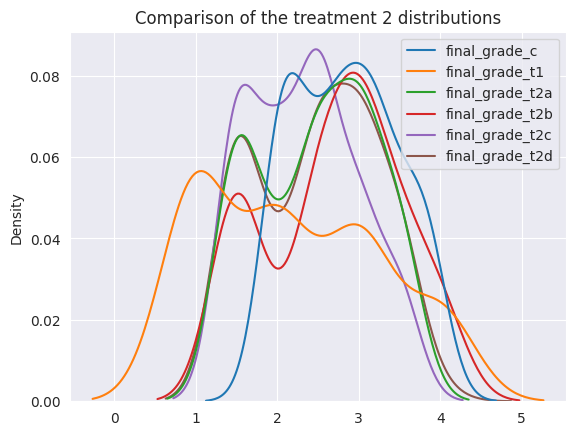

In [10]:
# Plot the distribution of the different subtreatments
sns.set_style('darkgrid')
sns.kdeplot(t2_comparison, fill=False).set(title='Comparison of the treatment 2 distributions');

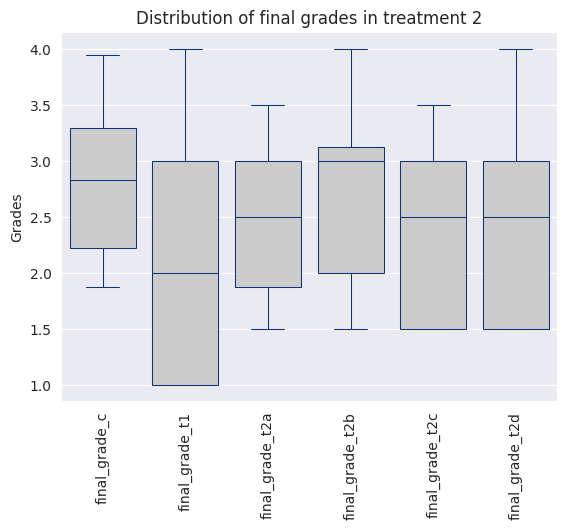

In [11]:
# Boxplot of the different subtreatments
sns.boxplot(t2_comparison, color=".8", linecolor="#137", linewidth=.75)
plt.xticks(rotation=90)
plt.title('Distribution of final grades in treatment 2')
plt.ylabel('Grades');

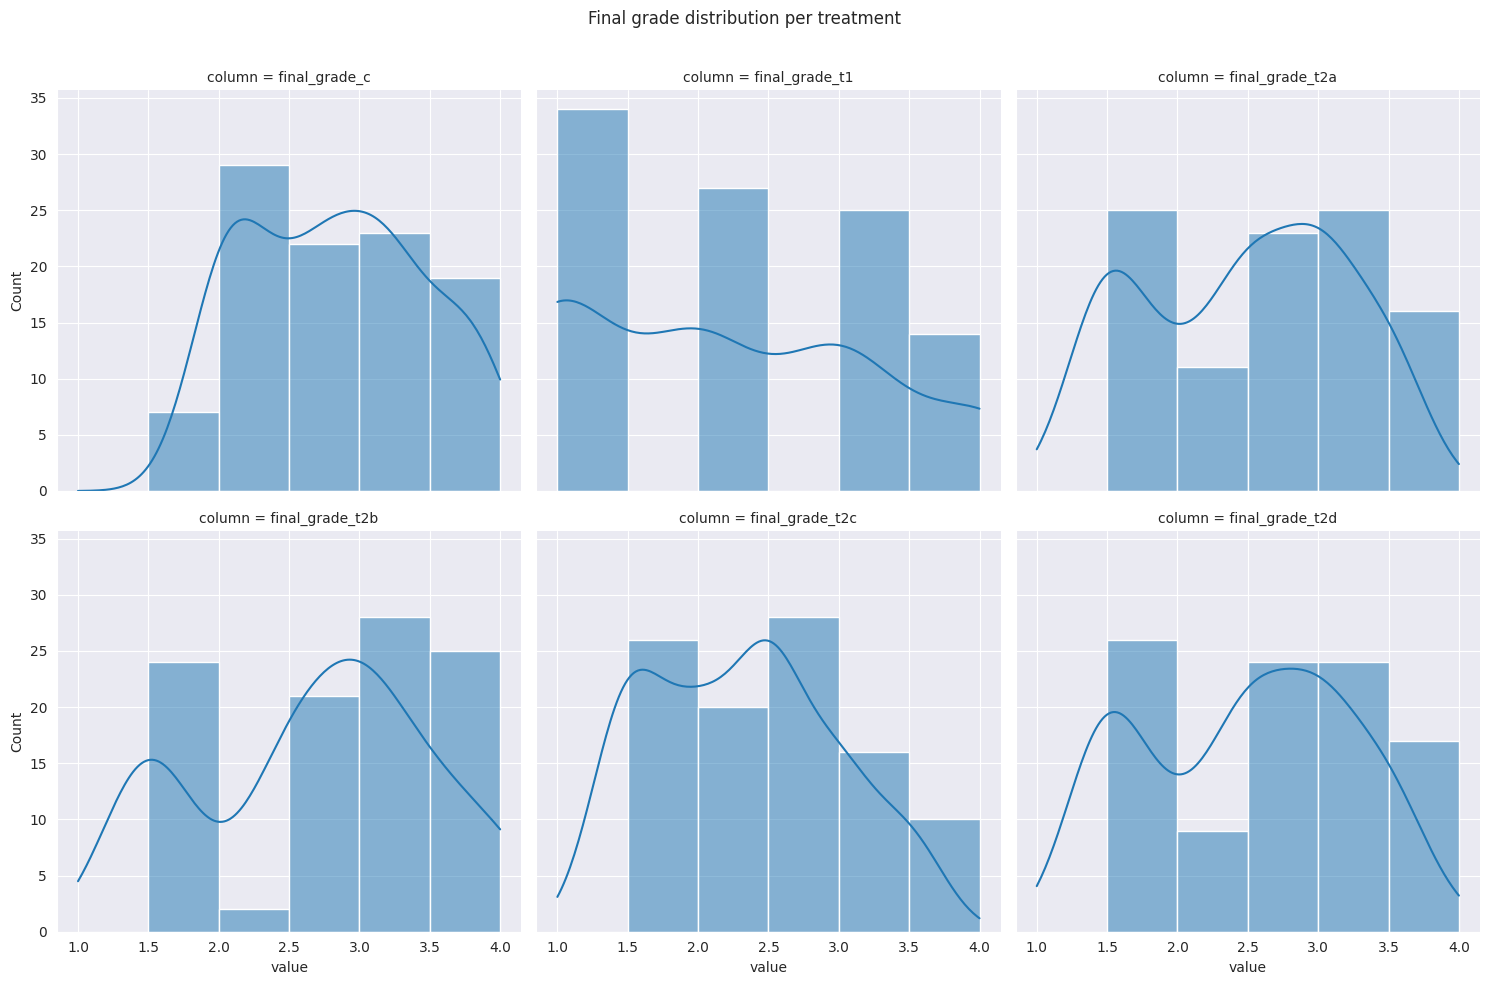

In [12]:
# Prepare the dataframe for ploting by melting it.
t2_comparison_melted = t2_comparison.melt(var_name='column', value_name='value')

# Plot the histogram with kde for the treatments.
dis = sns.displot(t2_comparison_melted, x='value', col='column', kde=True, bins=6, col_wrap=3)
dis.fig.subplots_adjust(top=0.9)
dis.fig.suptitle('Final grade distribution per treatment');

In [13]:
# Create dictionary with the results of the ANOVA and T-test
dict_stats = {}
for col in t2_comparison.columns[1:]:
  stat_anova, p_value_anova = stats.f_oneway(t2_comparison['final_grade_c'], t2_comparison[col])
  stat_ttest, p_value_ttest = stats.ttest_ind(t2_comparison['final_grade_c'], t2_comparison[col])
  dict_stats[col] = {'stat_anova': stat_anova, 'p_value_anova': p_value_anova, 'stat_ttest': stat_ttest, 'p_value_ttest': p_value_ttest}

# Create a dataframe with the statistics
stats_df = pd.DataFrame(dict_stats).T
stats_df

,stat_anova,p_value_anova,stat_ttest,p_value_ttest
final_grade_t1,27.953433,3.270449e-07,5.287101,3.270449e-07
final_grade_t2a,14.548928,1.824194e-04,3.814306,1.824194e-04
final_grade_t2b,2.158972,1.433266e-01,1.469344,1.433266e-01
final_grade_t2c,33.428988,2.842296e-08,5.781781,2.842296e-08
final_grade_t2d,13.370453,3.275465e-04,3.656563,3.275465e-04


### Statistical Analysis Report:
**Effects of Treatments on Final Grades**

The table presents the results of statistical comparisons between the control treatment (Tc) and five other treatments (T1, T2a, T2b, T2c, and T2d) using both ANOVA and t-tests. Treatments T2a, T2c, and T2d all demonstrated statistically significant differences from the control, with p-values well below 0.05 in both tests. Notably, T2c showed the strongest effect, with the lowest p-value (2.84e-08) and the highest test statistics (ANOVA: 33.43, t-test: 5.78), indicating a highly significant deviation from the control. T2a and T2d also showed meaningful differences, with p-values of approximately 1.82e-04 and 3.28e-04, respectively. In contrast, T2b did not differ significantly from the control group, as indicated by its high p-values (ANOVA: 0.143, t-test: 0.143), suggesting that T2b produced results most similar to the control treatment. These findings indicate that T1, T2a, T2c, and T2d had a statistically significant impact on final grades, while T2b did not.

## Treatment 3

In this set of treatments, the grading system will have seven categorical grades from 1.0 to 4.0, using just one decimal grade in between of the integers, namely `1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0`. The grades of the evidences were taken from the control treatment and were transformed using different approaches (approximation and rounding to the floor)

### Treatment 3a: approx - floor

This treatment has the following characteristics:
* The grades of the evidences are approximated to the closest grade (When the decimal of the grades are .5 it rounded to the grade above)
* The grades of the goals and the grades of the period are rounded to the floor

In [14]:
# Transform the grades into 10 categorical grades
t3_p1 = tc_p1_df.map(lambda x: transform_grade_10approx(x))
t3_p2 = tc_p2_df.map(lambda x: transform_grade_10approx(x))
t3_p3 = tc_p3_df.map(lambda x: transform_grade_10approx(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t3_p1, goals_dict, transform_grade_10floor)
grades_p2_df = grade_goal_treatments(t3_p2, goals_dict, transform_grade_10floor)
grades_p3_df = grade_goal_treatments(t3_p3, goals_dict, transform_grade_10floor)

# Summarize the results of the grades and the period in one dataframe
grades_t3_a = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t3_a['final_grade'] = grades_t3_a['final_grade'].map(lambda x: transform_grade_10floor(x))
grades_t3_a.rename(columns={'final_grade': 'final_grade_t3a'}, inplace=True)
grades_t3_a[summary_final_grades + ['final_grade_t3a']].head()
grades_t3_a.head()

,goal_1_p1,goal_2_p1,goal_3_p1,goal_4_p1,period_p1,goal_1_p2,goal_2_p2,goal_3_p2,goal_4_p2,period_p2,goal_1_p3,goal_2_p3,goal_3_p3,goal_4_p3,period_p3,final_grade_t3a
0,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7
1,2.3,2.3,2.3,2.7,2.3,2.7,2.7,2.3,2.3,2.3,2.7,2.7,2.7,2.3,2.3,2.3
2,1.7,2.3,2.3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.7,1.7,1.7,1.7
3,3.7,3.7,3.3,4.0,3.3,3.7,3.3,3.7,3.7,3.3,3.7,3.7,3.7,3.7,3.7,3.3
4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,2.0,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7


### Treatment 3b: approx - approx

This treatment has the following characteristics:
* The grades of the evidences are approximated to the closest grade (When the decimal of the grades are .5 it rounded to the grade above)
* The grades of the goals and the grades of the period are also approximated to the closest grade

In [15]:
# Transform the grades into 10 categorical grades
t3_p1 = tc_p1_df.map(lambda x: transform_grade_10approx(x))
t3_p2 = tc_p2_df.map(lambda x: transform_grade_10approx(x))
t3_p3 = tc_p3_df.map(lambda x: transform_grade_10approx(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t3_p1, goals_dict, transform_grade_10approx)
grades_p2_df = grade_goal_treatments(t3_p2, goals_dict, transform_grade_10approx)
grades_p3_df = grade_goal_treatments(t3_p3, goals_dict, transform_grade_10approx)

# Summarize the results of the grades and the period in one dataframe
grades_t3_b = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t3_b['final_grade'] = grades_t3_b['final_grade'].map(lambda x: transform_grade_10approx(x))
grades_t3_b.rename(columns={'final_grade': 'final_grade_t3b'}, inplace=True)
grades_t3_b[summary_final_grades + ['final_grade_t3b']].head()

,period_p1,period_p2,period_p3,final_grade_t3b
0,2.7,2.7,2.7,2.7
1,2.7,2.7,2.7,2.7
2,2.0,2.0,1.7,1.7
3,3.7,3.7,3.7,3.7
4,1.7,1.7,1.7,1.7


### Treatment 3c: floor - floor

In this treatment, the grades of the evidences are transformed rounding to the floor, and the grades of the goals and the periods are calculated also rounding to the floor.

In [16]:
# Transform the grades into 10 categorical grades
t3_p1 = tc_p1_df.map(lambda x: transform_grade_10floor(x))
t3_p2 = tc_p2_df.map(lambda x: transform_grade_10floor(x))
t3_p3 = tc_p3_df.map(lambda x: transform_grade_10floor(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t3_p1, goals_dict, transform_grade_10floor)
grades_p2_df = grade_goal_treatments(t3_p2, goals_dict, transform_grade_10floor)
grades_p3_df = grade_goal_treatments(t3_p3, goals_dict, transform_grade_10floor)

# Summarize the results of the grades and the period in one dataframe
grades_t3_c = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t3_c['final_grade'] = grades_t3_c['final_grade'].map(lambda x: transform_grade_10floor(x))
grades_t3_c.rename(columns={'final_grade': 'final_grade_t3c'}, inplace=True)
grades_t3_c[summary_final_grades + ['final_grade_t3c']].head()

,period_p1,period_p2,period_p3,final_grade_t3c
0,2.3,2.3,2.3,2.3
1,2.3,2.3,2.3,2.3
2,2.0,2.0,1.7,1.7
3,3.3,3.3,3.3,3.3
4,1.3,1.3,1.7,1.3


### Treatment 3d: floor - approx

In this treatment, the grades of the evidences are transformed rounding to the floor, and the grades of the goals and the periods are calculated approximating to the closest grade.

In [17]:
# Transform the grades into 10 categorical grades
t3_p1 = tc_p1_df.map(lambda x: transform_grade_10floor(x))
t3_p2 = tc_p2_df.map(lambda x: transform_grade_10floor(x))
t3_p3 = tc_p3_df.map(lambda x: transform_grade_10floor(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t3_p1, goals_dict, transform_grade_10approx)
grades_p2_df = grade_goal_treatments(t3_p2, goals_dict, transform_grade_10approx)
grades_p3_df = grade_goal_treatments(t3_p3, goals_dict, transform_grade_10approx)

# Summarize the results of the grades and the period in one dataframe
grades_t3_d = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t3_d['final_grade'] = grades_t3_d['final_grade'].map(lambda x: transform_grade_10approx(x))
grades_t3_d.rename(columns={'final_grade': 'final_grade_t3d'}, inplace=True)
grades_t3_d[summary_final_grades + ['final_grade_t3d']].head()

,period_p1,period_p2,period_p3,final_grade_t3d
0,2.7,2.7,2.7,2.7
1,2.3,2.7,2.3,2.3
2,2.0,2.0,1.7,1.7
3,3.7,3.7,3.7,3.7
4,1.7,1.7,1.7,1.7


### Treatment 3: Statistical analysis

* H0: There is not significant difference between the control and the treatments
* H1: There is a significant difference between the control and the treatments

**If p < 0.05:** reject H0 (The difference is considered statistically significant)

In [18]:
# Data Frame with the comparison of the different subtreatments for treatment 3
t3_comparison = pd.DataFrame(
    [grades_control['final_grade_c'],
     grades_t1['final_grade_t1'],
     grades_t3_a['final_grade_t3a'],
     grades_t3_b['final_grade_t3b'],
     grades_t3_c['final_grade_t3c'],
     grades_t3_d['final_grade_t3d']
     ]).T
t3_comparison.describe()

,final_grade_c,final_grade_t1,final_grade_t3a,final_grade_t3b,final_grade_t3c,final_grade_t3d
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.840500,2.190000,2.539000,2.725000,2.396000,2.621000
std,0.623391,1.060732,0.643992,0.721863,0.633719,0.697368
min,1.870000,1.000000,1.700000,1.700000,1.300000,1.700000
25%,2.217500,1.000000,1.925000,2.000000,1.700000,1.700000
50%,2.830000,2.000000,2.700000,2.700000,2.300000,2.700000
75%,3.290000,3.000000,3.000000,3.300000,3.000000,3.000000
max,3.940000,4.000000,3.700000,4.000000,3.700000,4.000000


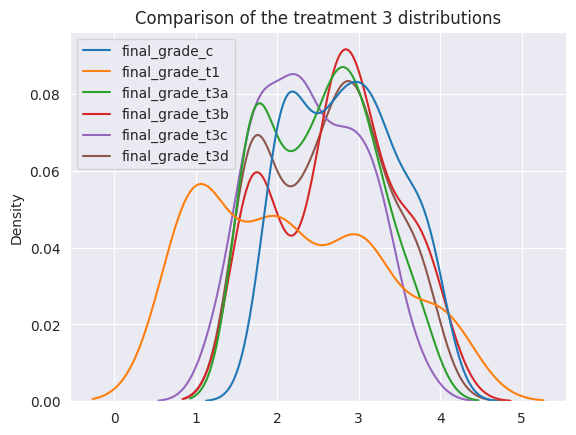

In [19]:
# Plot the distribution of the different subtreatments
sns.kdeplot(t3_comparison, fill=False).set(title='Comparison of the treatment 3 distributions');

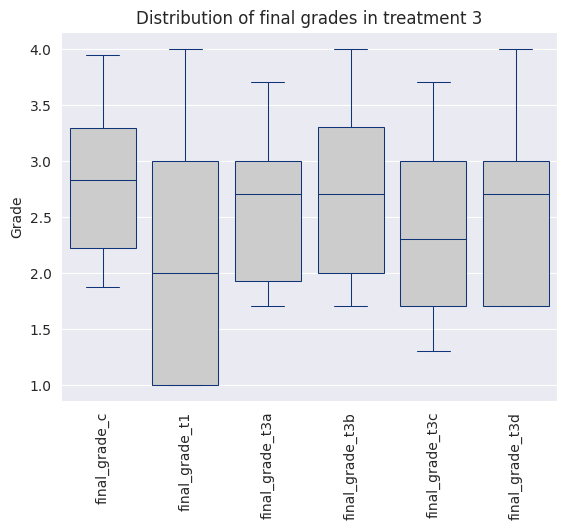

In [20]:
# Boxplot of the different treatments
sns.boxplot(t3_comparison, color=".8", linecolor="#137", linewidth=.75)
plt.xticks(rotation=90)
plt.title('Distribution of final grades in treatment 3')
plt.ylabel('Grade');

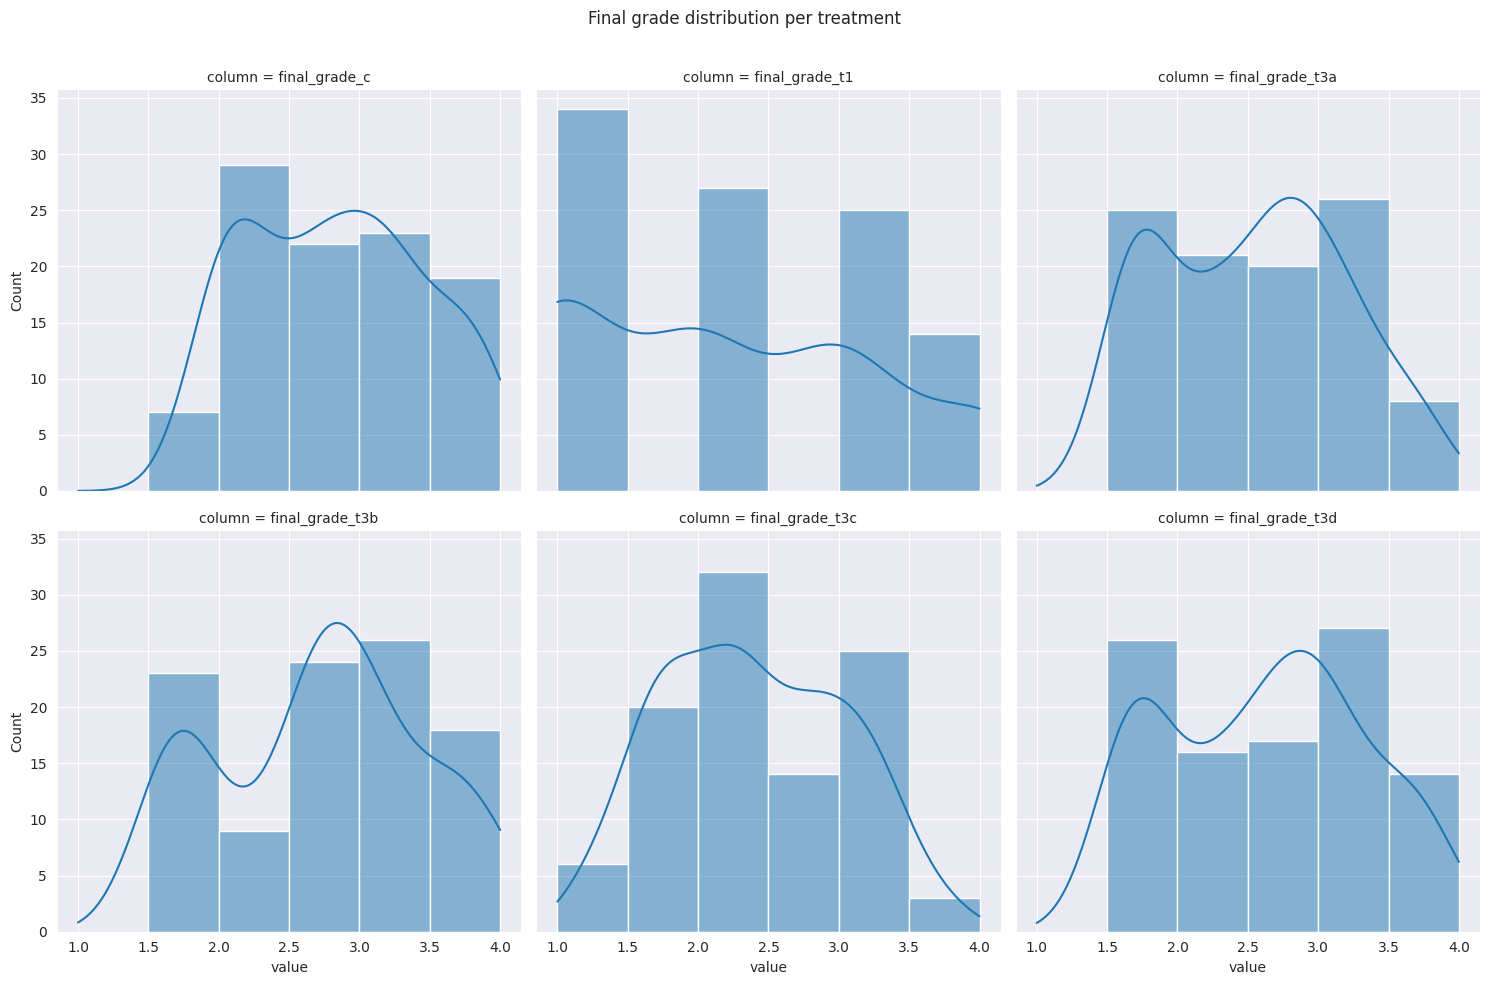

In [21]:
# Prepare the dataframe for ploting by melting it
t3_comparison_melted = t3_comparison.melt(var_name='column', value_name='value')

# Plot the histograms with kde for the treatments
dis = sns.displot(t3_comparison_melted, x='value', col='column', bins=6, kde=True, col_wrap=3)
dis.fig.suptitle('Final grade distribution per treatment')
dis.fig.subplots_adjust(top=0.9);

Statistical analysis:
* H0: There is not significant difference between the control and the treatments
* H1: There is a significant difference between the control and the treatments

If p < 0.05, reject H0 (The difference is considered statistically significant)

In [22]:
# Create dictionary with the results of the ANOVA and T-test
dict_stats = {}
for col in t3_comparison.columns[1:]:
  stat_anova, p_value_anova = stats.f_oneway(t3_comparison['final_grade_c'], t3_comparison[col])
  stat_ttest, p_value_ttest = stats.ttest_ind(t3_comparison['final_grade_c'], t3_comparison[col])
  dict_stats[col] = {'stat_anova': stat_anova, 'p_value_anova': p_value_anova, 'stat_ttest': stat_ttest, 'p_value_ttest': p_value_ttest}

# Create a dataframe with the statistics
stats_df = pd.DataFrame(dict_stats).T
stats_df

,stat_anova,p_value_anova,stat_ttest,p_value_ttest
final_grade_t1,27.953433,3.270449e-07,5.287101,3.270449e-07
final_grade_t3a,11.315494,9.228203e-04,3.363851,9.228203e-04
final_grade_t3b,1.466441,2.273516e-01,1.210967,2.273516e-01
final_grade_t3c,25.003293,1.257432e-06,5.000329,1.257432e-06
final_grade_t3d,5.506697,1.993194e-02,2.346635,1.993194e-02


### Statistical Comparison Report:
**Treatment Effects on Final Grades**

Among the treatments, T3c shows the strongest statistical difference from the control, with a high ANOVA statistic (25.00) and a t-test value of 5.00, accompanied by a p-value of 1.26e-06, indicating a highly significant effect. Similarly, T3a differs significantly from the control, with an ANOVA p-value of 9.23e-04 and a t-test value of 3.36, also showing a notable deviation from T1.

T3d also reaches statistical significance, albeit to a lesser extent, with p-values of 0.0199 in both tests. This suggests that while T3d has an effect, it is smaller than that of T3a and T3c.

In contrast, T3b does not show a statistically significant difference from the control group. Its p-values (ANOVA: 0.227; t-test: 0.227) are well above the conventional threshold of 0.05, and the test statistics are comparatively low (ANOVA: 1.47; t-test: 1.21). Therefore, T3b is the treatment most similar to the control in terms of final grade outcomes.

## Treatment 4

In this set of treatments, the grading system will have seven categorical grades from 1.0 to 4.0, using just one decimal grade in between of the integers, namely `1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0`. Different from the treatment 2, here the grades that were transformed where the percentual grades.

### Treatment 4a:  ptge - approx

In this treatment, the grade of the evidences are transformed based on the percentage of achivement and the grades of the goals and the periods are calculated approximating to the closest grade.

In [23]:
# Transform the grades into 7 categorical grades
t4_p1 = period_1_df.map(lambda x: transform_grade_percent7(x))
t4_p2 = period_2_df.map(lambda x: transform_grade_percent7(x))
t4_p3 = period_3_df.map(lambda x: transform_grade_percent7(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t4_p1, goals_dict, transform_grade_7approx)
grades_p2_df = grade_goal_treatments(t4_p2, goals_dict, transform_grade_7approx)
grades_p3_df = grade_goal_treatments(t4_p3, goals_dict, transform_grade_7approx)

# Summarize the results of the goals and the period in one dataframe
grades_t4_a = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t4_a['final_grade'] = grades_t4_a['final_grade'].map(lambda x: transform_grade_7approx(x))
grades_t4_a.rename(columns={'final_grade': 'final_grade_t4a'}, inplace=True)
grades_t4_a[summary_final_grades + ['final_grade_t4a']].head()

,period_p1,period_p2,period_p3,final_grade_t4a
0,3.0,3.0,3.0,3.0
1,2.5,2.5,2.5,2.5
2,2.0,2.0,2.0,2.0
3,4.0,4.0,4.0,4.0
4,1.5,1.5,1.5,1.5


### Treatment 4b: ptge - floor

In this treatment, the grade of the evidences are transformed based on the percentage of achivement and the grades of the goals and the periods are calculated approximating to the grade below.

In [24]:
# Transform the grades into 7 categorical grades
t4_p1 = period_1_df.map(lambda x: transform_grade_percent7(x))
t4_p2 = period_2_df.map(lambda x: transform_grade_percent7(x))
t4_p3 = period_3_df.map(lambda x: transform_grade_percent7(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t4_p1, goals_dict, transform_grade_7floor)
grades_p2_df = grade_goal_treatments(t4_p2, goals_dict, transform_grade_7floor)
grades_p3_df = grade_goal_treatments(t4_p3, goals_dict, transform_grade_7floor)

# Summarize the results of the goals and the period in one dataframe
grades_t4_b = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t4_b['final_grade'] = grades_t4_b['final_grade'].map(lambda x: transform_grade_7floor(x))
grades_t4_b.rename(columns={'final_grade': 'final_grade_t4b'}, inplace=True)
grades_t4_b[summary_final_grades + ['final_grade_t4b']].head()

,period_p1,period_p2,period_p3,final_grade_t4b
0,2.5,2.5,2.5,2.5
1,2.5,2.5,2.5,2.5
2,2.0,2.0,2.0,2.0
3,3.5,3.5,4.0,3.5
4,1.5,1.5,1.5,1.5


### Treatment 4: Statistical analysis


* H0: There is not significant difference between the control and the treatments
* H1: There is a significant difference between the control and the treatments

**If p < 0.05:** reject H0 (The difference is considered statistically significant)

In [25]:
# Data Frame with the comparison of the different subtreatments for treatment 4
t4_comparison = pd.DataFrame(
    [grades_control['final_grade_c'],
     grades_t1['final_grade_t1'],
     grades_t4_a['final_grade_t4a'],
     grades_t4_b['final_grade_t4b']
     ]).T
t4_comparison.describe()

,final_grade_c,final_grade_t1,final_grade_t4a,final_grade_t4b
count,100.000000,100.000000,100.000000,100.000000
mean,2.840500,2.190000,2.765000,2.555000
std,0.623391,1.060732,0.865894,0.768361
min,1.870000,1.000000,1.500000,1.500000
25%,2.217500,1.000000,2.000000,2.000000
50%,2.830000,2.000000,3.000000,2.500000
75%,3.290000,3.000000,3.500000,3.000000
max,3.940000,4.000000,4.000000,4.000000


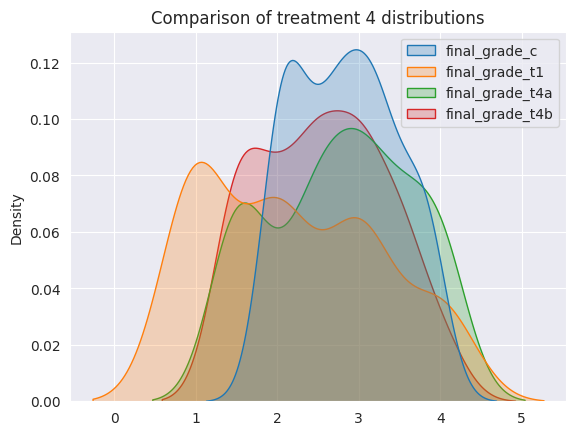

In [26]:
# Plot the distribution of the different subtreatments
sns.kdeplot(t4_comparison, fill=True).set(title='Comparison of treatment 4 distributions');

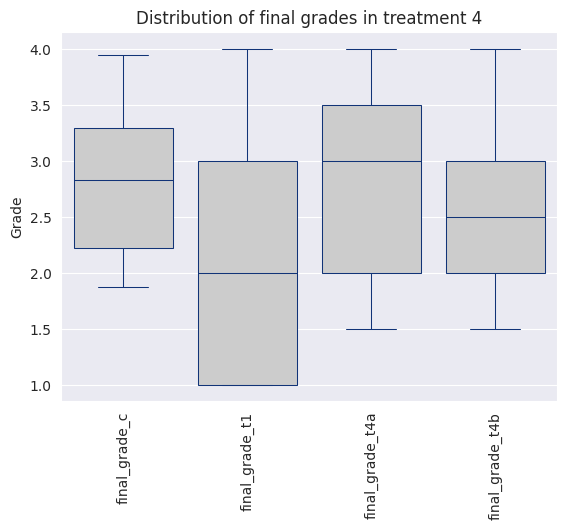

In [27]:
# Boxplot of the different treatments
sns.boxplot(t4_comparison, color=".8", linecolor="#137", linewidth=.75)
plt.xticks(rotation=90)
plt.title('Distribution of final grades in treatment 4')
plt.ylabel('Grade');

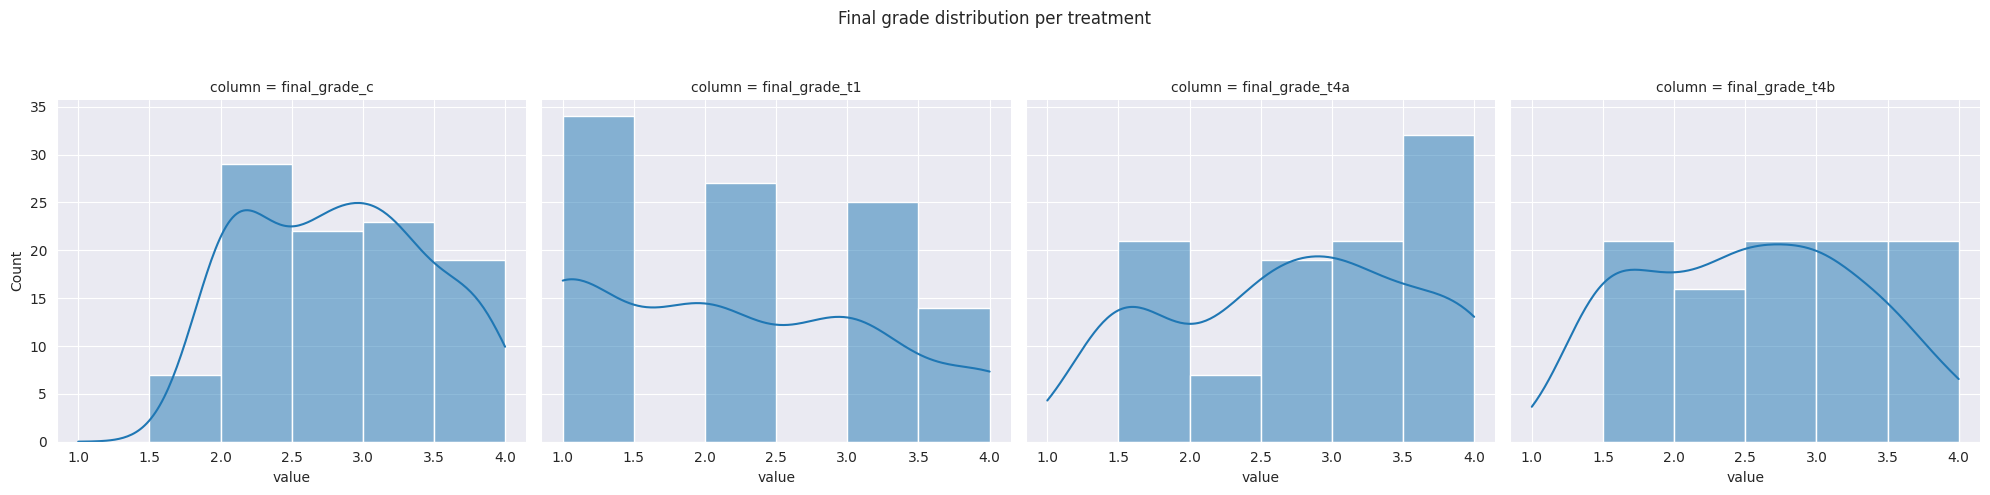

In [28]:
# Prepare the dataframe for ploting by melting it
t4_comparison_melted = t4_comparison.melt(var_name='column', value_name='value')

# Plot the histograms with kde for the treatments
dis = sns.displot(t4_comparison_melted, x='value', col='column', bins=6, kde=True)
dis.fig.suptitle('Final grade distribution per treatment')
dis.fig.subplots_adjust(top=0.8);

In [29]:
# Create dictionary with the results of the ANOVA and T-test
dict_stats = {}
for col in t4_comparison.columns[1:]:
  stat_anova, p_value_anova = stats.f_oneway(t4_comparison['final_grade_c'], t4_comparison[col])
  stat_ttest, p_value_ttest = stats.ttest_ind(t4_comparison['final_grade_c'], t4_comparison[col])
  dict_stats[col] = {'stat_anova': stat_anova, 'p_value_anova': p_value_anova, 'stat_ttest': stat_ttest, 'p_value_ttest': p_value_ttest}

# Create a dataframe with the statistics
stats_df_t4 = pd.DataFrame(dict_stats).T
stats_df_t4

,stat_anova,p_value_anova,stat_ttest,p_value_ttest
final_grade_t1,27.953433,3.270449e-07,5.287101,3.270449e-07
final_grade_t4a,0.500729,4.800120e-01,0.707622,4.800120e-01
final_grade_t4b,8.325905,4.341617e-03,2.885464,4.341617e-03


### Statistical Comparison Report:

Using one-way ANOVA and independent t-tests was conducted to evaluate the impact of treatments T1, T4a, and T4b on final grades relative to the control group. The analysis revealed that T1 had a highly significant effect on final grades, with both the ANOVA and t-test yielding p-values below 0.001 (p = 3.27e-07), indicating a strong and reliable difference from the control. Treatment T4b also showed a statistically significant difference, with p-values below 0.01 (p ≈ 0.0043), suggesting a moderate positive effect. In contrast, T4a showed no statistically significant difference from the control group (p ≈ 0.4800), as both the ANOVA and t-test p-values were high, indicating that T4a likely does not impact student performance. These results highlight T1 and T4b can have significat effect on the grades, while T4a appears to have no meaningful effect.

## Treatment 5

### Treatment 5a: ptge - approx

In [30]:
# Transform the grades into 10 categorical grades
t5_p1 = period_1_df.map(lambda x: transform_grade_percent10(x))
t5_p2 = period_2_df.map(lambda x: transform_grade_percent10(x))
t5_p3 = period_3_df.map(lambda x: transform_grade_percent10(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t5_p1, goals_dict, transform_grade_10approx)
grades_p2_df = grade_goal_treatments(t5_p2, goals_dict, transform_grade_10approx)
grades_p3_df = grade_goal_treatments(t5_p3, goals_dict, transform_grade_10approx)

# Summarize the results of the grades and the period in one dataframe
grades_t5_a = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t5_a['final_grade'] = grades_t5_a['final_grade'].map(lambda x: transform_grade_10approx(x))
grades_t5_a.rename(columns={'final_grade': 'final_grade_t5a'}, inplace=True)
grades_t5_a[summary_final_grades + ['final_grade_t5a']].head()

,period_p1,period_p2,period_p3,final_grade_t5a
0,3.0,3.0,3.0,3.0
1,2.7,2.7,2.7,2.7
2,2.3,2.0,2.0,2.0
3,4.0,4.0,4.0,4.0
4,1.7,1.7,1.7,1.7


### Treatment 5b: ptge - floor

In [31]:
# Transform the grades into 10 categorical grades
t5_p1 = period_1_df.map(lambda x: transform_grade_percent10(x))
t5_p2 = period_2_df.map(lambda x: transform_grade_percent10(x))
t5_p3 = period_3_df.map(lambda x: transform_grade_percent10(x))

# Calculate the grades of the goals and the grade of the period
grades_p1_df = grade_goal_treatments(t5_p1, goals_dict, transform_grade_10floor)
grades_p2_df = grade_goal_treatments(t5_p2, goals_dict, transform_grade_10floor)
grades_p3_df = grade_goal_treatments(t5_p3, goals_dict, transform_grade_10floor)

# Summarize the results of the grades and the period in one dataframe
grades_t5_b = create_final_grades(grades_p1_df, grades_p2_df, grades_p3_df)

# Summarize the grades of the periods
grades_t5_b['final_grade'] = grades_t5_b['final_grade'].map(lambda x: transform_grade_10floor(x))
grades_t5_b.rename(columns={'final_grade': 'final_grade_t5b'}, inplace=True)
grades_t5_b[summary_final_grades + ['final_grade_t5b']].head()

,period_p1,period_p2,period_p3,final_grade_t5b
0,2.7,2.7,2.7,2.7
1,2.3,2.3,2.3,2.3
2,2.0,2.0,2.0,2.0
3,3.7,3.7,3.7,3.7
4,1.7,1.7,1.7,1.7


### Treatment 5: Statistical analysis

* H0: There is not significant difference between the control and the treatments
* H1: There is a significant difference between the control and the treatments

**If p < 0.05:** reject H0 (The difference is considered statistically significant)

In [32]:
# Data Frame with the comparison of the different subtreatments for treatment 2
t5_comparison = pd.DataFrame(
    [grades_control['final_grade_c'],
     grades_t1['final_grade_t1'],
     grades_t5_a['final_grade_t5a'],
     grades_t5_b['final_grade_t5b']
     ]).T
t4_comparison.describe()

,final_grade_c,final_grade_t1,final_grade_t4a,final_grade_t4b
count,100.000000,100.000000,100.000000,100.000000
mean,2.840500,2.190000,2.765000,2.555000
std,0.623391,1.060732,0.865894,0.768361
min,1.870000,1.000000,1.500000,1.500000
25%,2.217500,1.000000,2.000000,2.000000
50%,2.830000,2.000000,3.000000,2.500000
75%,3.290000,3.000000,3.500000,3.000000
max,3.940000,4.000000,4.000000,4.000000


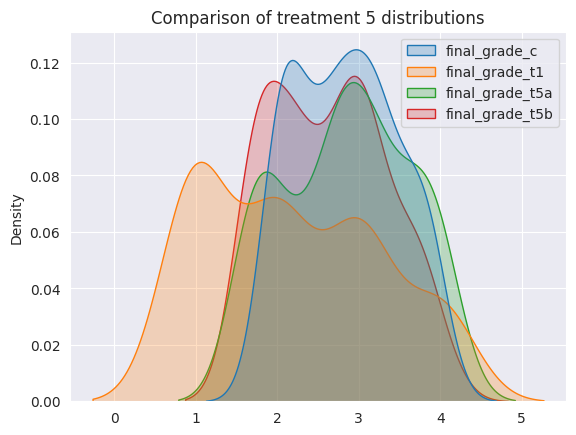

In [33]:
# Plot the distribution of the different subtreatments
sns.kdeplot(t5_comparison, fill=True).set(title='Comparison of treatment 5 distributions');

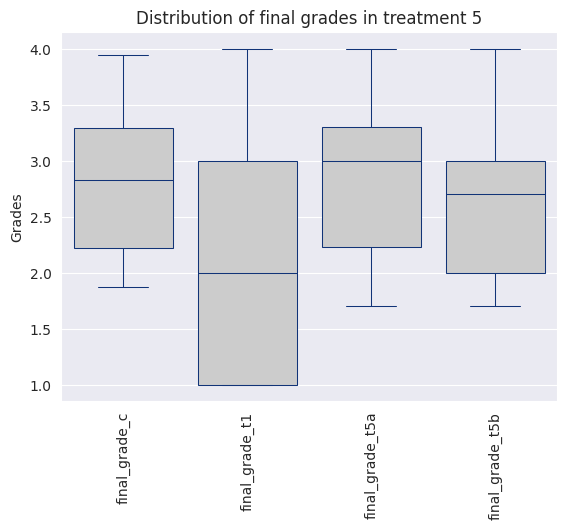

In [34]:
# Boxplot of the different subtritments
sns.boxplot(t5_comparison, color=".8", linecolor="#137", linewidth=.75)
plt.xticks(rotation=90)
plt.title('Distribution of final grades in treatment 5')
plt.ylabel('Grades');

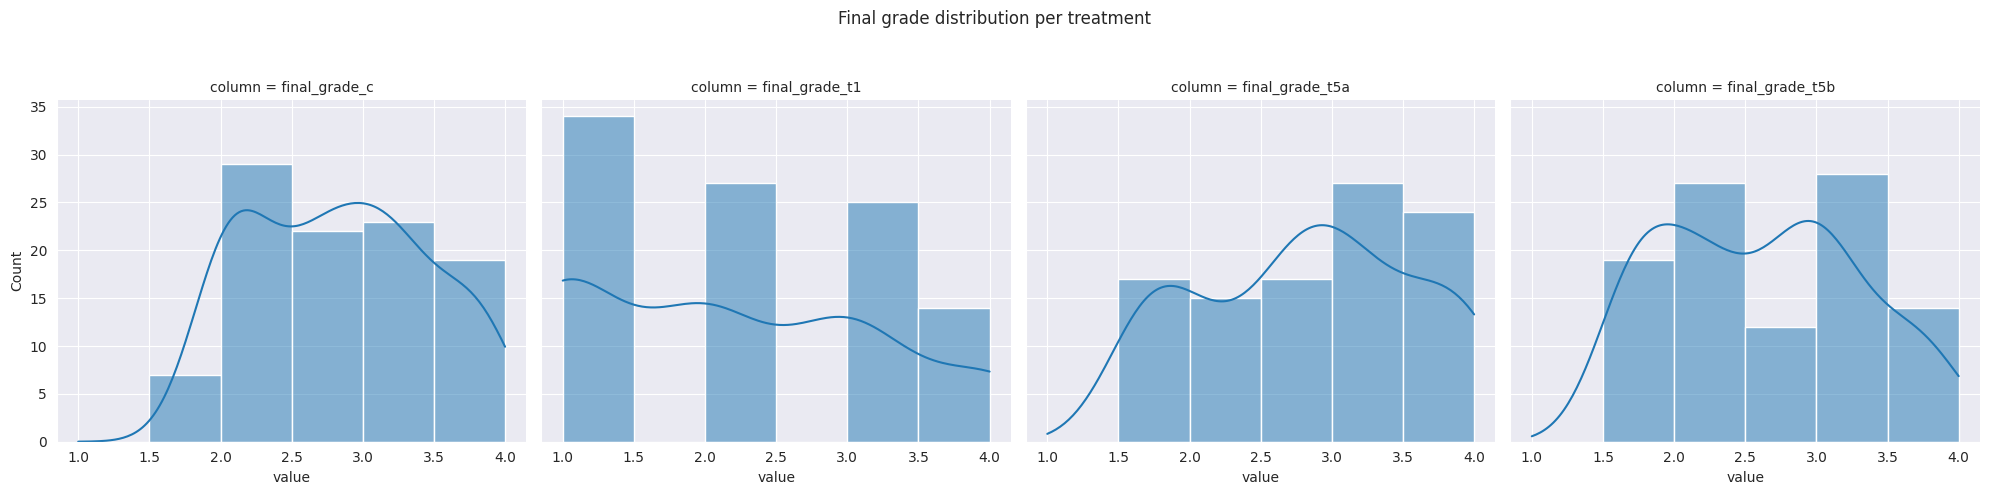

In [35]:
# Prepare the dataframe for ploting by melting it
t5_comparison_melted = t5_comparison.melt(var_name='column', value_name='value')

# Plot the histograms with kde for the treatments
dis = sns.displot(t5_comparison_melted, x='value', col='column', bins=6, kde=True)
dis.fig.suptitle('Final grade distribution per treatment')
dis.fig.subplots_adjust(top=0.8);

In [36]:
# Create dictionary with the results of the ANOVA and T-test
dict_stats = {}
for col in t5_comparison.columns[1:]:
  stat_anova, p_value_anova = stats.f_oneway(t5_comparison['final_grade_c'], t5_comparison[col])
  stat_ttest, p_value_ttest = stats.ttest_ind(t5_comparison['final_grade_c'], t5_comparison[col])
  dict_stats[col] = {'stat_anova': stat_anova, 'p_value_anova': p_value_anova, 'stat_ttest': stat_ttest, 'p_value_ttest': p_value_ttest}

# Create a dataframe with the statistics
stats_df_t5 = pd.DataFrame(dict_stats).T
stats_df_t5

,stat_anova,p_value_anova,stat_ttest,p_value_ttest
final_grade_t1,27.953433,3.270449e-07,5.287101,3.270449e-07
final_grade_t5a,0.000231,9.878954e-01,0.015191,9.878954e-01
final_grade_t5b,5.282679,2.258278e-02,2.298408,2.258278e-02


### Statistical Comparison Report:

A statistical evaluation was conducted to examine the effects of treatments T1, T5a, and T5b on final grades compared to a control group, using both one-way ANOVA and independent t-tests. The analysis showed that T1 had a highly significant effect on final grades, with extremely low p-values in both the ANOVA and t-test (p = 3.27e-07), confirming its strong positive impact. Treatment T5b also showed a statistically significant difference, though to a lesser extent, with p ≈ 0.0226 in both tests, suggesting a modest effect on performance. Conversely, T5a demonstrated no statistically significant difference from the control group (p ≈ 0.988), as indicated by both tests, implying that T5a likely has no meaningful impact on students' final grades.

## Best treatments

In this section the best treatments are going to be compared to select the one that fits the need of the grading system

### Statistical analysis

In [37]:
# Dataframe with the information of the best treatments
best_treatments = pd.DataFrame(
    {'tc': grades_control['final_grade_c'],
     't4a': t4_comparison['final_grade_t4a'],
     't5a': t5_comparison['final_grade_t5a'],
     't3b': t3_comparison['final_grade_t3b'],
     't2b': t2_comparison['final_grade_t2b'],
    #  't1': grades_t1['final_grade_t1']
    })
best_treatments.describe()

,tc,t4a,t5a,t3b,t2b
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.840500,2.765000,2.839000,2.725000,2.690000
std,0.623391,0.865894,0.765796,0.721863,0.812715
min,1.870000,1.500000,1.700000,1.700000,1.500000
25%,2.217500,2.000000,2.225000,2.000000,2.000000
50%,2.830000,3.000000,3.000000,2.700000,3.000000
75%,3.290000,3.500000,3.300000,3.300000,3.125000
max,3.940000,4.000000,4.000000,4.000000,4.000000


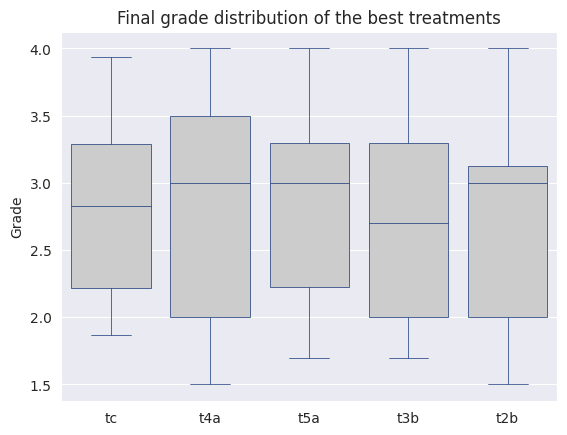

In [38]:
# Boxplot showing the result of the best treatments
sns.boxplot(best_treatments, color='0.8', linecolor='#137', linewidth=0.5)
plt.title('Final grade distribution of the best treatments')
plt.ylabel('Grade');

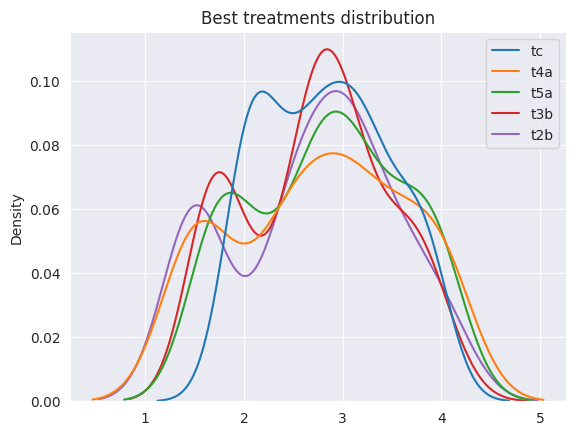

In [39]:
# Kdeplot show the distribution of the best treatments
sns.kdeplot(best_treatments, fill=False).set(title='Best treatments distribution');

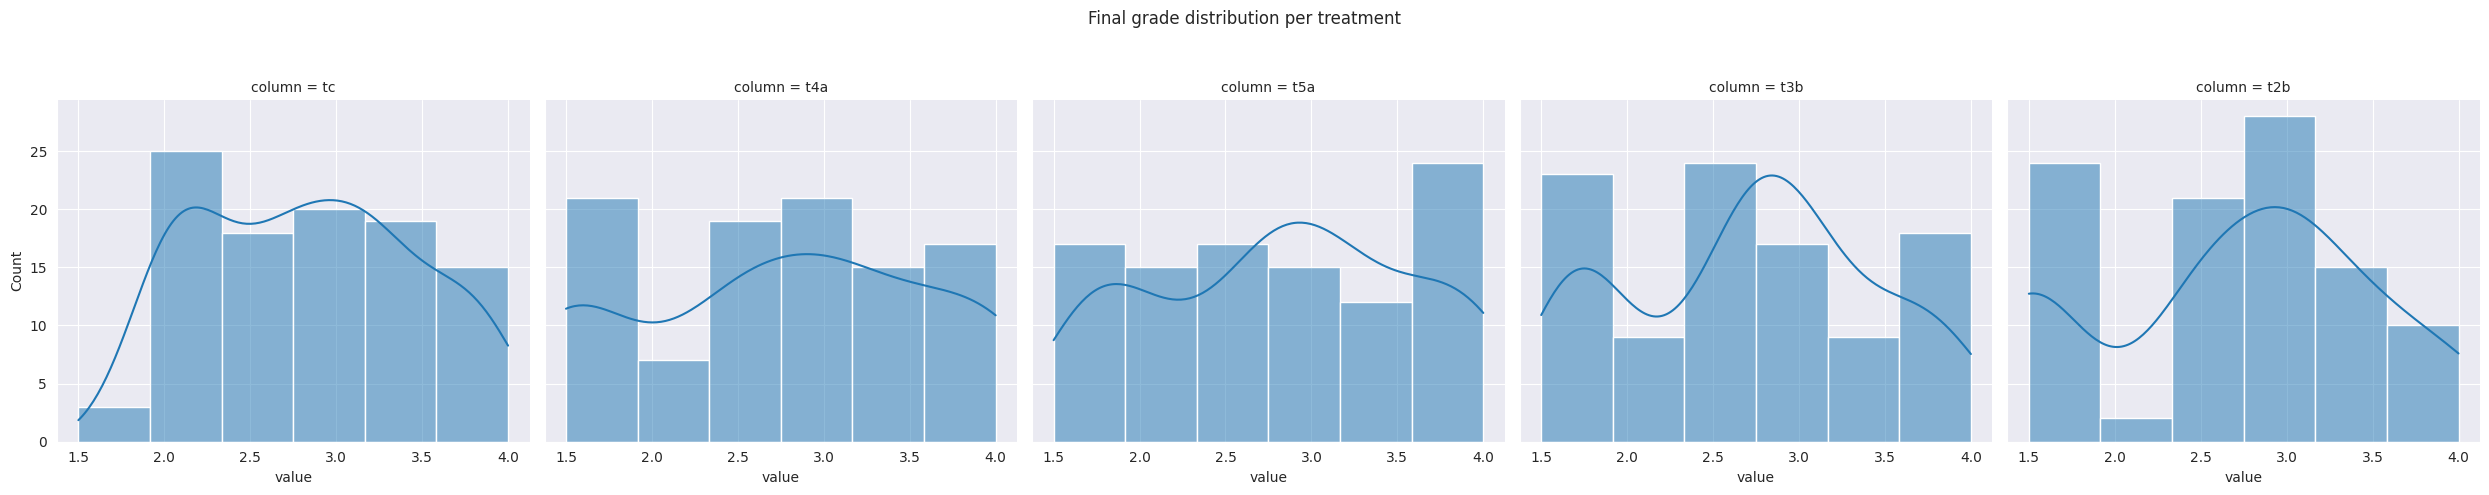

In [40]:
# Prepare the dataframe for ploting by melting it
best_treatments_comparison_melted = best_treatments.melt(var_name='column', value_name='value')

# Plot the histograms with kde for the treatments
dis = sns.displot(best_treatments_comparison_melted, x='value', col='column', bins=6, kde=True)
dis.fig.subplots_adjust(top=0.8)
dis.fig.suptitle('Final grade distribution per treatment');

### Statistical Comparison Report:



In [41]:
# Create dictionary with the results of the ANOVA and T-test
dict_stats = {}
for col in best_treatments.columns[1:]:
  stat_anova, p_value_anova = stats.f_oneway(best_treatments['tc'], best_treatments[col])
  stat_ttest, p_value_ttest = stats.ttest_ind(best_treatments['tc'], best_treatments[col])
  dict_stats[col] = {'stat_anova': stat_anova, 'p_value_anova': p_value_anova, 'stat_ttest': stat_ttest, 'p_value_ttest': p_value_ttest}

# Create a dataframe with the statistics
stats_best_treat = pd.DataFrame(dict_stats).T
stats_best_treat

,stat_anova,p_value_anova,stat_ttest,p_value_ttest
t4a,0.500729,0.480012,0.707622,0.480012
t5a,0.000231,0.987895,0.015191,0.987895
t3b,1.466441,0.227352,1.210967,0.227352
t2b,2.158972,0.143327,1.469344,0.143327


Based on the statistical analysis presented in the table, all four treatments—T4a, T5a, T3b, and T2b—exhibited no statistically significant difference from the control group. This is evidenced by their high p-values from both ANOVA and t-tests (all well above the conventional α = 0.05 threshold). Among these, T5a is the treatment most similar to the control, with the highest p-value of approximately 0.9879 for both tests, and a near-zero t-statistic (0.015), indicating virtually no difference in effect. Similarly, T4a (p ≈ 0.4800), T2b (p ≈ 0.1433), and T3b (p ≈ 0.2274) also showed no meaningful deviation from the control. These results suggest that none of the listed treatments produced a statistically significant impact on final grades, and T5a in particular aligns most closely with the outcomes of the control condition. Therefore, it can be concluded that these treatments did not alter student performance in any measurable way.

###  Treatment in a student

In this section a student can be chosen to analyze how their grades compare in the control treatment and in the two chosen treatments (t5a and t4a)

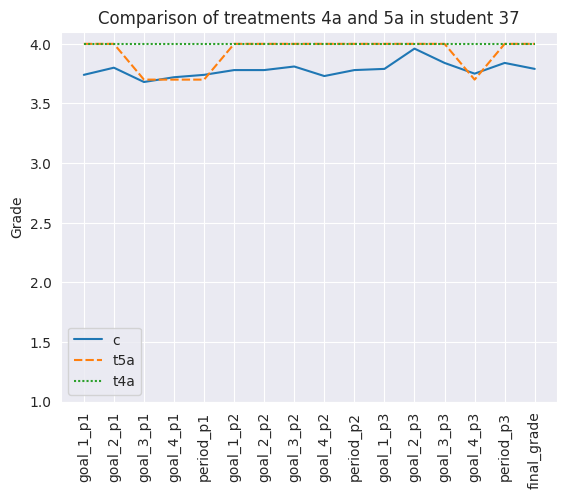

,goal_1_p1,goal_2_p1,goal_3_p1,goal_4_p1,period_p1,goal_1_p2,goal_2_p2,goal_3_p2,goal_4_p2,period_p2,goal_1_p3,goal_2_p3,goal_3_p3,goal_4_p3,period_p3,final_grade
c,3.74,3.8,3.68,3.72,3.74,3.78,3.78,3.81,3.73,3.78,3.79,3.96,3.84,3.75,3.84,3.79
t5a,4.00,4.0,3.70,3.70,3.70,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.70,4.00,4.00
t4a,4.00,4.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [42]:
# Choosing a student
student = random.randint(1, 100)

# Creating a dataframe with the grades of the student
# student_c = grades_control.iloc[student - 1].filter(like='goal')
student_c = grades_control.iloc[student - 1].rename({'final_grade_c': 'final_grade'})
student_t5a = grades_t5_a.iloc[student - 1].rename({'final_grade_t5a': 'final_grade'})
student_t4a = grades_t4_a.iloc[student - 1].rename({'final_grade_t4a': 'final_grade'})
student_grade_df = pd.DataFrame([student_c, student_t5a, student_t4a], index=['c', 't5a', 't4a'])

# Ploting the grades with the chosen treatments
sns.lineplot(student_grade_df.T)
plt.xticks(rotation=90)
plt.ylim(1.0, 4.1)
plt.title(f'Comparison of treatments 4a and 5a in student {student}')
plt.ylabel('Grade')
plt.show();

student_grade_df